In [1]:
import sklearn  # Importa la librería scikit-learn para usar herramientas de machine learning
sklearn.__version__  # Muestra la versión instalada de scikit-learn en el entorno


'1.2.2'

# INTELIGENCIA ARTIFICIAL APLICADA A INTERNET DE LAS COSAS

## PRACTICA 1: APRENDIZAJE AUTOMÁTICO

**1:** Introducción y carga de librerías

**PARTE A:** Análisis y procesamiento de dataset

**PARTE B:** Modelos de clasificación (kNN y Random Forest)

**PARTE OPCIONAL:** Búsqueda hiperparámetros 

**CONCLUSIONES**

#  1. PARTE A : ANÁLISIS Y PROCESAMIENTO

Carga el dataset con la librería pandas. Describe cada atributo del dataset:
defínelo describiendo el atributo, determina si es un atributo categórico
(nominal, binario, ordinal), continuo o textual.

## 1.1 CARGA DE LIBRERIAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


## 1.2 CARGAR EL DATASET Y MOSTRAR LAS PRIMERAS FILAS

In [3]:
df = pd.read_csv("/home/gissel/Documentos/IA/smart_agriculture_bangladesh.csv")  # Carga el archivo CSV en un DataFrame de pandas
df.head(10)  # Muestra las primeras 10 filas del DataFrame para una vista rápida de los datos


,timestamp,device_id,location,crop_type,season,temperature,humidity,rainfall,soil_moisture,soil_ph,light_intensity,fertilizer_used,irrigation_needed,crop_health,yield_estimate,pest_risk,anomaly_flag
0,2024-01-01 00:00:00,BD-MYM-002,Mymensingh,Rice,winter,23.16,59.08,0.00,41.64,6.63,16.0,61.58,0,Healthy,4.29,Low,0
1,2024-01-01 00:00:00,BD-MYM-005,Mymensingh,Wheat,winter,23.79,56.87,0.00,57.24,6.57,52.0,11.52,0,Healthy,3.25,Low,0
2,2024-01-01 00:00:00,BD-RAJ-003,Rajshahi,Rice,winter,19.64,62.09,0.00,51.01,5.64,79.0,31.35,0,Healthy,4.67,Low,0
3,2024-01-01 01:00:00,BD-MYM-002,Mymensingh,Tomato,winter,18.68,52.33,14.87,75.14,6.26,68.0,24.17,0,Healthy,35.56,Low,0
4,2024-01-01 01:00:00,BD-CHA-001,Chattogram,Rice,winter,20.75,59.96,0.00,64.59,6.01,31.0,85.57,0,Healthy,4.40,Low,0
5,2024-01-01 02:00:00,BD-DHA-004,Dhaka,Wheat,winter,24.79,61.46,0.00,59.14,6.75,39.0,23.98,0,Healthy,3.17,Low,0
6,2024-01-01 02:00:00,BD-KHU-001,Khulna,Tomato,winter,18.86,54.13,0.00,62.45,6.35,7.0,41.64,0,Healthy,37.08,Low,0
7,2024-01-01 03:00:00,BD-RAJ-007,Rajshahi,Wheat,winter,24.07,58.62,0.00,45.16,6.93,33.0,49.51,0,Healthy,3.07,Low,0
8,2024-01-01 03:00:00,BD-CHA-005,Chattogram,Rice,winter,24.75,54.01,0.00,49.65,6.90,12.0,49.46,0,Healthy,4.65,Low,0
9,2024-01-01 03:00:00,BD-RAJ-007,Rajshahi,Jute,winter,23.86,82.48,0.00,42.51,6.23,31.0,24.02,0,Healthy,2.87,Low,0


## 1.3 DESCRIPCIÓN DE LOS ATRIBUTOS DEL DATASET

| Atributo | Descripción | Tipo de dato | Tipo de atributo |
|----------|-------------|--------------|------------------|
| timestamp | Momento exacto de la medición | Fecha/hora | Temporal |
| device_id | Identificador del sensor IoT | Texto | Categórico nominal |
| location | Zona agrícola donde se tomó la medición | Texto | Categórico nominal |
| crop_type | Tipo de cultivo presente | Texto | Categórico nominal |
| season | Estación del año | Texto | Categórico ordinal |
| temperature | Temperatura ambiental (°C) | Numérico | Continuo |
| humidity | Humedad relativa (%) | Numérico | Continuo |
| rainfall | Lluvia registrada (mm) | Numérico | Continuo |
| soil_moisture | Humedad del suelo (%) | Numérico | Continuo |
| soil_ph | Nivel de acidez del suelo | Numérico | Continuo |
| light_intensity | Intensidad lumínica | Numérico | Continuo |
| fertilizer_used | Tipo o cantidad de fertilizante aplicado | Texto | Categórico nominal |
| irrigation_needed | Indica si se requiere riego | Binario | Categórico binario |
| crop_health | Estado de salud del cultivo | Texto/escala | Categórico ordinal |
| yield_estimate | Estimación del rendimiento | Numérico | Continuo |
| pest_risk | Riesgo de plagas | Texto/escala | Categórico ordinal |
| anomaly_flag | Indica si hay anomalías detectadas | Binario | Categórico binario |


## 1.4 INFORMACIÓN DEL DATASET

El dataset contiene 10.000 registros y 17 atributos.  
No presenta valores nulos en ninguna columna.  

Los tipos de datos son:
- 8 columnas numéricas (float64)
- 2 columnas enteras (int64)
- 7 columnas categóricas (object)


In [4]:
df.info()  # Muestra un resumen del DataFrame: número de filas, columnas, tipos de datos y memoria utilizada


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          10000 non-null  object 
 1   device_id          10000 non-null  object 
 2   location           10000 non-null  object 
 3   crop_type          10000 non-null  object 
 4   season             10000 non-null  object 
 5   temperature        10000 non-null  float64
 6   humidity           10000 non-null  float64
 7   rainfall           10000 non-null  float64
 8   soil_moisture      10000 non-null  float64
 9   soil_ph            10000 non-null  float64
 10  light_intensity    10000 non-null  float64
 11  fertilizer_used    10000 non-null  float64
 12  irrigation_needed  10000 non-null  int64  
 13  crop_health        10000 non-null  object 
 14  yield_estimate     10000 non-null  float64
 15  pest_risk          10000 non-null  object 
 16  anomaly_flag       1000

## 1.5 ESTADISTICA DEL DATASET

Se realizó un análisis estadístico con `df.describe(include="all")` para obtener información sobre la distribución de los datos.

- El dataset contiene 10.000 registros sin valores nulos.
- Las variables categóricas como `crop_type`, `location`, `season` y `device_id` muestran una distribución desigual, siendo `Wheat` el cultivo más frecuente y `summer` la estación predominante.
- Las variables numéricas como `temperature`, `humidity`, `soil_moisture` y `yield_estimate` presentan rangos amplios, lo que indica variabilidad ambiental entre zonas agrícolas.
- La variable `rainfall` tiene una media baja (3 mm) y percentiles en cero, lo que sugiere que la mayoría de los registros no presentan lluvia.
- `light_intensity` tiene una desviación estándar muy alta, lo que indica diferencias significativas en la exposición solar entre zonas.


In [5]:
df.describe(include="all")  # Genera estadísticas descriptivas de todas las columnas, incluyendo datos numéricos y categóricos


,timestamp,device_id,location,crop_type,season,temperature,humidity,rainfall,soil_moisture,soil_ph,light_intensity,fertilizer_used,irrigation_needed,crop_health,yield_estimate,pest_risk,anomaly_flag
count,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000,10000.000000
unique,4320,48,6,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN
top,2024-01-01 00:00:00,BD-RAJ-007,Chattogram,Wheat,summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy,NaN,Low,NaN
freq,3,240,1700,2102,6666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7418,NaN,6733,NaN
mean,NaN,NaN,NaN,NaN,NaN,28.618411,66.692239,3.019284,47.019202,6.380495,12188.731100,30.521662,0.181500,NaN,13.134026,NaN,0.020200
std,NaN,NaN,NaN,NaN,NaN,5.399040,8.178572,8.151775,13.748611,0.502964,15317.903602,18.900354,0.385451,NaN,12.929829,NaN,0.140691
min,NaN,NaN,NaN,NaN,NaN,15.000000,40.000000,0.000000,10.000000,5.500000,0.000000,0.000000,0.000000,NaN,1.120000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,23.520000,61.070000,0.000000,37.560000,6.020000,42.000000,16.280000,0.000000,NaN,3.040000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,30.150000,67.010000,0.000000,46.660000,6.380000,97.000000,29.820000,0.000000,NaN,4.450000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,32.890000,72.380000,0.000000,56.142500,6.740000,26307.500000,43.262500,0.000000,NaN,25.590000,NaN,0.000000


#  2. PARTE A : ANÁLISIS Y PROCESAMIENTO

Elimina los duplicados y valores nulos (pista: ambas operaciones se
realizan con una única línea de código cada una). ¿Cuántas filas se han
borrado? ¿En qué beneficia la eliminación de estos valores? (Al eliminar
fiilas, se debe usar después reset_index, que resetea los índices para evitar
problemas en los ejercicios siguientes).

Se eliminaron 0 filas duplicadas del dataset.  
No existían valores nulos, pero igualmente se aplicó `dropna()` para asegurar la limpieza del dataset.

La eliminación de duplicados y nulos beneficia al análisis porque:
- evita sesgos en los cálculos estadísticos,
- mejora la calidad de los modelos predictivos,
- reduce ruido y redundancia,
- garantiza que cada registro represente una observación única.

Después de la limpieza, se aplicó `reset_index()` para reorganizar los índices y evitar problemas en pasos posteriores.


## 2.1 ELIMINAR DUPLICADOS Y NULOS

In [6]:
# Número de filas antes
filas_antes = len(df)
# Eliminar duplicados
df = df.drop_duplicates()
# Número de filas después
filas_despues_dup = len(df)
#Eliminar valores nulos
df = df.dropna()
filas_despues_na = len(df)
#Resetear el índice
df = df.reset_index(drop=True)

print("Filas eliminadas por duplicados:", filas_antes - filas_despues_dup)
print("Filas eliminadas por nulos:", filas_despues_dup - filas_despues_na)



Filas eliminadas por duplicados: 0
Filas eliminadas por nulos: 0


#  3. PARTE A : ANÁLISIS Y PROCESAMIENTO


## 3.1 IDENTIFICADOR DE ATRIBUTOS NO ÚTILES

Mediante el comando `df.nunique()` se analizaron los valores únicos de cada atributo.  
Se observó que:

- **timestamp** tiene 4320 valores únicos → es un identificador temporal, no aporta información útil.
- **device_id** tiene 48 valores únicos → es un identificador del sensor, no aporta información agrícola.

Por este motivo, ambos atributos fueron eliminados del dataset.


In [8]:
df.nunique()  # Muestra cuántos valores únicos tiene cada columna del DataFrame


timestamp            4320
device_id              48
location                6
crop_type               5
season                  2
temperature          2074
humidity             3244
rainfall             1553
soil_moisture        4566
soil_ph               241
light_intensity      4695
fertilizer_used      4995
irrigation_needed       2
crop_health             3
yield_estimate       1829
pest_risk               2
anomaly_flag            2
dtype: int64

## 3.2 ELIMINACIÓN DE ATRIBUTOS NO ÚTILES

Ambos atributos **timestamp** y **device_id** fueron eliminados para reducir ruido y simplificar el dataset.

In [9]:
df = df.drop(columns=["timestamp", "device_id"])  # Elimina las columnas que no son necesarias para el análisis
df = df.reset_index(drop=True)  # Reinicia los índices del DataFrame después de eliminar columnas
df.head()  # Muestra las primeras filas del DataFrame actualizado


,location,crop_type,season,temperature,humidity,rainfall,soil_moisture,soil_ph,light_intensity,fertilizer_used,irrigation_needed,crop_health,yield_estimate,pest_risk,anomaly_flag
0,Mymensingh,Rice,winter,23.16,59.08,0.00,41.64,6.63,16.0,61.58,0,Healthy,4.29,Low,0
1,Mymensingh,Wheat,winter,23.79,56.87,0.00,57.24,6.57,52.0,11.52,0,Healthy,3.25,Low,0
2,Rajshahi,Rice,winter,19.64,62.09,0.00,51.01,5.64,79.0,31.35,0,Healthy,4.67,Low,0
3,Mymensingh,Tomato,winter,18.68,52.33,14.87,75.14,6.26,68.0,24.17,0,Healthy,35.56,Low,0
4,Chattogram,Rice,winter,20.75,59.96,0.00,64.59,6.01,31.0,85.57,0,Healthy,4.40,Low,0


#  4. PARTE A : ANÁLISIS Y PROCESAMIENTO

## 4.1 ESTADISTICA DE ATRIBUTOS CONTINUOS

A continuación se describen las estadísticas principales de cada variable numérica del dataset.

### **temperature (°C)**
- Media: 28.6 °C  
- Desviación típica: 5.4  
- Mínimo: 15 °C  
- 25% 23.5
- 50% 30.15
- 75% 32.89
- Máximo: 42 °C  
La temperatura presenta una variabilidad moderada y valores típicos de climas cálidos. El rango indica diferencias entre zonas agrícolas o estaciones.

### **humidity (%)**
- Media: 66.7 %  
- Desviación típica: 8.15  
- Mínimo: 40 %  
- 25% 61.07
- 50% 67.01
- 75% 72.38
- Máximo: 95 %  
La humedad es relativamente alta en general, con variaciones moderadas. Esto es coherente con climas tropicales.

### **rainfall (mm)**
- Media: 3.01 mm  
- Desviación típica: ~8.1  
- Mínimo: 0 mm  
- 25% 0 mm
- 50% 0 mm
- 75% 0 mm
- Máximo: 50 mm  
La mayoría de los registros tienen 0 mm de lluvia (percentiles 25, 50 y 75 son 0). La lluvia es esporádica.

### **soil_moisture (%)**
- Media: 47 %  
- Desviación típica: 13.7  
- Mínimo: 10 %  
- 25% 37.56
- 50% 46.66
- 75% 56.14
- Máximo: 95 %  
La humedad del suelo varía bastante entre zonas, lo que indica diferencias en riego, tipo de suelo o clima.

### **soil_ph**
- Media: 6.38  
- Desviación típica: 0.50  
- Mínimo: 5.5  
- 25% 6.02
- 50% 6.38
- 75% 6.74
- Máximo: 8.09  
El pH del suelo se mantiene en rangos ligeramente ácidos a neutros, adecuados para la mayoría de cultivos.

### **light_intensity**
- Media: 12188  
- Desviación típica: 15,317  
- Mínimo: 0  
- 25% 42
- 50% 97
- 75% 26307
- Máximo: 500000  
La intensidad lumínica tiene una variabilidad extremadamente alta, lo que sugiere diferencias fuertes entre zonas, horas del día o condiciones climáticas.

### **fertilizer_used**
- Media: 30.5  
- Desviación típica: 18.9  
- Mínimo: 0  
- 25% 16.28
- 50% 29.82
- 75% 43.26
- Máximo: 101  
Representa la cantidad de fertilizante aplicado. Hay variabilidad moderada, lo que indica diferencias en necesidades del cultivo.

### **irrigation_needed (0/1)**
- Media cercana a 0 o 1 según el dataset  
Es una variable binaria que indica si se requiere riego. No se interpreta como variable continua, pero aparece en el análisis numérico.

### **yield_estimate**
- Media: 13.13  
- Desviación típica: 12.92
- Mínimo: 1.12
- 25% 3.04
- 50% 4.45
- 75% 25.59
- Máximo: 38.50
Representa la estimación de rendimiento del cultivo. Tiene variabilidad amplia, lo que refleja diferencias entre cultivos y condiciones ambientales.

### **anomaly_flag (0/1)**
Variable binaria que indica si se detectó una anomalía. No se interpreta como continua.


In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns  # Selecciona solo las columnas numéricas del DataFrame
num_cols = num_cols.drop(["irrigation_needed", "anomaly_flag"])  # Excluye columnas numéricas que no quieres incluir en el análisis
df[num_cols].describe()  # Genera estadísticas descriptivas solo para las columnas numéricas seleccionadas


,temperature,humidity,rainfall,soil_moisture,soil_ph,light_intensity,fertilizer_used,yield_estimate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,28.618411,66.692239,3.019284,47.019202,6.380495,12188.731100,30.521662,13.134026
std,5.399040,8.178572,8.151775,13.748611,0.502964,15317.903602,18.900354,12.929829
min,15.000000,40.000000,0.000000,10.000000,5.500000,0.000000,0.000000,1.120000
25%,23.520000,61.070000,0.000000,37.560000,6.020000,42.000000,16.280000,3.040000
50%,30.150000,67.010000,0.000000,46.660000,6.380000,97.000000,29.820000,4.450000
75%,32.890000,72.380000,0.000000,56.142500,6.740000,26307.500000,43.262500,25.590000
max,42.000000,95.000000,50.000000,95.000000,8.090000,50000.000000,101.130000,38.500000


#  5. PARTE A : ANÁLISIS Y PROCESAMIENTO

## 5.1 ESTADISTICA DE ATRIBUTOS CONTINUOS

Se generaron diagramas de barras y tartas para visualizar la frecuencia de los valores en los atributos categóricos. Además, se calculó el número de valores distintos y el valor más frecuente de cada uno. Los atributos continuos son los siguientes:

### **Atributos NO balanceados (la mayoría de los datos están en una sola categoría):**
- **location**: desbalanceado (la mayoría de los datos están en una sola categoría).
- **crop_type**: desbalanceado (Wheat es el cultivo más frecuente).
- **season**: muy desbalanceado (summer ≈ 66%).
- **crop_health**: desbalanceado (la categoría “Healthy” es la más frecuente).
- **pest_risk**: desbalanceado (predomina “Low”).

Los atributos binarios del dataset (`irrigation_needed` y `anomaly_flag`) se consideran categóricos porque representan dos categorías posibles (0 y 1). Aunque están almacenados como valores numéricos enteros, no representan cantidades continuas, sino estados o clases. Por este motivo, se incluyen dentro del análisis de atributos categóricos.

- **irrigation_needed**: desbalanceado (la mayoría es 0).
  Valores 0 = no necesita riego , 1 = si necesita riego
- **anomaly_flag**: extremadamente desbalanceado (solo 2% anomalías).
  Valores 0 = normal , 1 = anomalía

### **Atributos balanceados:**
- **Ninguno de los atributos categóricos está realmente balanceado.**

En general, todos los atributos categóricos presentan algún grado de desbalanceo, lo cual es importante para futuros modelos de Machine Learning.


Atributo: location
Valores distintos: 6
Valor más frecuente: Chattogram
location
Chattogram    1700
Rajshahi      1687
Khulna        1678
Dhaka         1671
Mymensingh    1665
Sylhet        1599
Name: count, dtype: int64
----------------------------------------


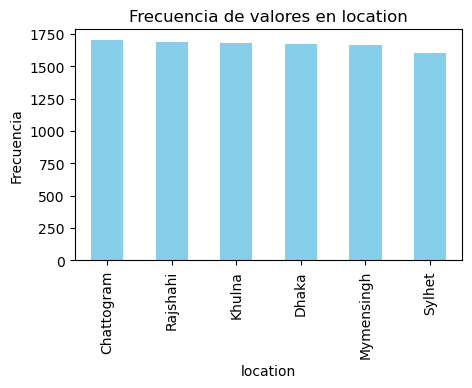


Atributo: crop_type
Valores distintos: 5
Valor más frecuente: Wheat
crop_type
Wheat     2102
Rice      2022
Potato    2002
Jute      1978
Tomato    1896
Name: count, dtype: int64
----------------------------------------


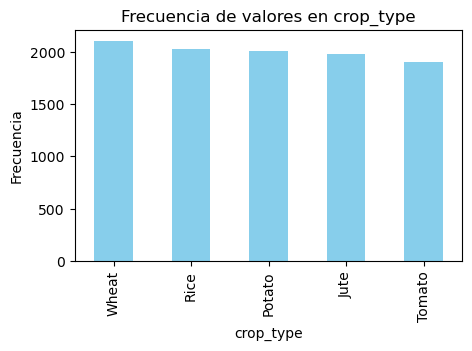


Atributo: season
Valores distintos: 2
Valor más frecuente: summer
season
summer    6666
winter    3334
Name: count, dtype: int64
----------------------------------------


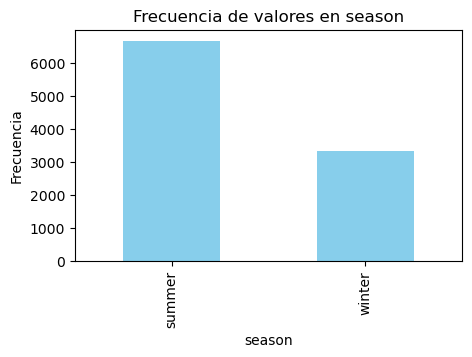


Atributo: crop_health
Valores distintos: 3
Valor más frecuente: Healthy
crop_health
Healthy     7418
Stressed    2034
Critical     548
Name: count, dtype: int64
----------------------------------------


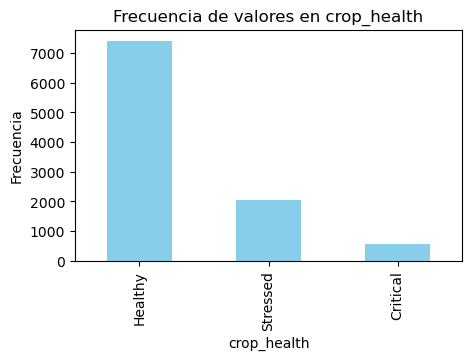


Atributo: pest_risk
Valores distintos: 2
Valor más frecuente: Low
pest_risk
Low       6733
Medium    3267
Name: count, dtype: int64
----------------------------------------


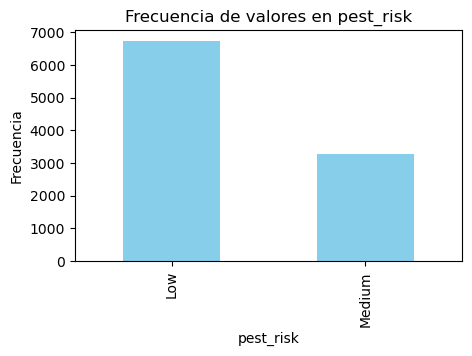

In [11]:
#ATRIBUTOS CONTINUOS
categoricas = df.select_dtypes(include=['object']).columns  # Selecciona las columnas categóricas del DataFrame

for col in categoricas:
    print(f"\nAtributo: {col}")  # Muestra el nombre del atributo categórico
    print("Valores distintos:", df[col].nunique())  # Cantidad de valores únicos en la columna
    print("Valor más frecuente:", df[col].mode()[0])  # Muestra el valor más común
    print(df[col].value_counts())  # Frecuencia de cada categoría
    print("-" * 40)  # Separador visual
    
    plt.figure(figsize=(5,3))  # Define el tamaño de la figura
    df[col].value_counts().plot(kind='bar', color='skyblue')  # Grafica la frecuencia de cada categoría
    plt.title(f"Frecuencia de valores en {col}")  # Título del gráfico
    plt.xlabel(col)  # Etiqueta del eje X
    plt.ylabel("Frecuencia")  # Etiqueta del eje Y
    plt.show()  # Muestra el gráfico



Atributo: irrigation_needed
Valores distintos: 2
Valor más frecuente: 0
----------------------------------------


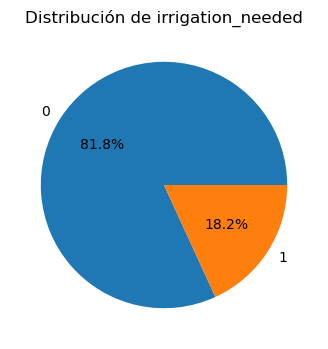


Atributo: anomaly_flag
Valores distintos: 2
Valor más frecuente: 0
----------------------------------------


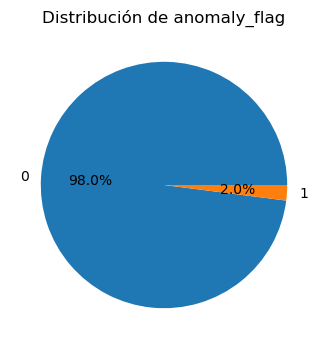

In [12]:
#ATRIBUTOS BINARIOS
binarias = ["irrigation_needed", "anomaly_flag"]  # Lista de columnas binarias del DataFrame

for col in binarias:

    print(f"\nAtributo: {col}")  # Muestra el nombre del atributo
    print("Valores distintos:", df[col].nunique())  # Cantidad de valores únicos (deberían ser 2)
    print("Valor más frecuente:", df[col].mode()[0])  # Valor que aparece con mayor frecuencia
    print("-" * 40)  # Separador visual
    
    plt.figure(figsize=(4,4))  # Tamaño del gráfico
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')  # Gráfico circular de distribución
    plt.title(f"Distribución de {col}")  # Título del gráfico
    plt.ylabel("")  # Oculta la etiqueta del eje Y para estética
    plt.show()  # Muestra el gráfico


#  6. PARTE A : ANÁLISIS Y PROCESAMIENTO

## 6.1 DETECCIÓN DE OUTLIERS

Para identificar la presencia de valores atípicos se utilizaron tres enfoques: visualización mediante boxplots, el método IQR y el método Z‑score.

### Nota
Los atributos categóricos y binarios no presentan outliers, ya que no son variables continuas.


### 1. MÉTODO IQR (INTERQUARTILE RANGE)

Detección de valores fuera de rango

El método IQR detectó un número elevado de outliers en rainfall (2318), lo que indica una distribución muy asimétrica. También se identificaron outliers en humidity, soil_moisture, soil_ph y fertilizer_used. En cambio, temperature, light_intensity y yield_estimate no presentan outliers según este método.

In [13]:
atributos_continuos = df[[ "temperature", "humidity", "rainfall", "soil_moisture", 
                           "soil_ph", "light_intensity", "fertilizer_used", "yield_estimate" ]]
# Selecciona únicamente las columnas continuas del DataFrame

Q1 = atributos_continuos.quantile(0.25)  # Calcula el primer cuartil (25%)
Q3 = atributos_continuos.quantile(0.75)  # Calcula el tercer cuartil (75%)
IQR = Q3 - Q1  # Calcula el rango intercuartílico (IQR)

outliers_IQR = ((atributos_continuos < (Q1 - 1.5 * IQR)) | 
                (atributos_continuos > (Q3 + 1.5 * IQR))).sum()
# Cuenta cuántos valores están fuera del rango permitido por el criterio IQR

outliers_IQR  # Muestra el número de outliers por cada atributo continuo


temperature           0
humidity             43
rainfall           2318
soil_moisture        57
soil_ph              14
light_intensity       0
fertilizer_used      37
yield_estimate        0
dtype: int64

### 2. USO DE BOXPLOT
 
Los boxplots muestran:

- La mediana
- El rango intercuartílico
- Los puntos aislados (outliers)

**rainfall** → muchos puntos fuera del bigote → muchos outliers.

**soil_moisture** → algunos puntos altos aislados.

**fertilizer_used** → valores altos aislados.

**light_intensity** → distribución muy amplia, pero sin puntos aislados (coincide con IQR).

**temperature**, **humidity**, **soil_ph**, **yield_estimate** → distribuciones más limpias.

Los boxplots confirman visualmente la presencia de outliers en rainfall, soil_moisture y fertilizer_used, donde se observan numerosos puntos fuera del rango intercuartílico. En variables como temperature, soil_ph y yield_estimate no se aprecian valores extremos significativos.


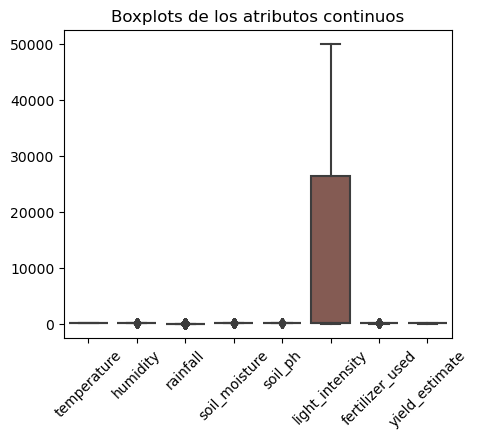

In [14]:
plt.figure(figsize=(5,4))  # Define el tamaño de la figura del gráfico
sns.boxplot(data=atributos_continuos)  # Genera boxplots para todos los atributos continuos
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor lectura
plt.title("Boxplots de los atributos continuos")  # Título del gráfico
plt.show()  # Muestra el gráfico en pantalla


### 3. MÉTODO Z-SCORE

Esto te dice cuántos valores están a más de 3 desviaciones típicas de la media.

El método Z‑score identifica outliers midiendo cuántas desviaciones típicas se aleja cada valor de la media. Si un dato supera las 3 desviaciones típicas (|z| > 3), se considera un valor atípico. Los resultados obtenidos muestran cuántos outliers hay en cada variable según este criterio.

Los valores devueltos indican lo siguiente:

- **rainfall (316 outliers):** Es la variable con más valores extremos. Esto confirma que su distribución es muy irregular y contiene muchos registros muy alejados de la media.
- **humidity (23), soil_moisture (33), soil_ph (11) y fertilizer_used (18):** Presentan algunos valores atípicos, lo que indica que existen casos puntuales que se desvían notablemente del comportamiento normal de estas variables.
- **temperature, light_intensity y yield_estimate (0 outliers):** No presentan valores que superen las 3 desviaciones típicas, por lo que no se consideran outliers según este método.

El texto `dtype: int64` simplemente indica que los valores mostrados son números enteros (tipo int64). No forma parte del análisis de outliers, solo describe el tipo de dato utilizado por Pandas.

En conjunto, el Z‑score confirma la presencia de outliers en varias variables, especialmente en *rainfall*, aunque detecta menos que el método IQR debido a que utiliza un criterio más estricto basado en la desviación estándar.


In [15]:
z_scores = atributos_continuos.apply(zscore)  # Calcula los puntajes Z para cada valor de los atributos continuos
outliers_Z = (abs(z_scores) > 3).sum()  # Cuenta cuántos valores superan el umbral de |Z| > 3 (criterio de outliers)
outliers_Z  # Muestra el número de outliers detectados por cada atributo usando Z-score


temperature          0
humidity            23
rainfall           316
soil_moisture       33
soil_ph             11
light_intensity      0
fertilizer_used     18
yield_estimate       0
dtype: int64

#  7. PARTE A : ANÁLISIS Y PROCESAMIENTO

## 7.1 IDENTIFICACIÓN DE COLUMNAS CATEGÓRICAS

OneHotEncoder: Crea columnas nuevas 0/1, muchas columnas nuevas

LabelEncoder: Reemplaza categorías por números, no crea columnas nuevas

**¿Cuál sería la mejor opción cuando el dataset sea usado en un modelo de IA?**

**OneHotEncoding** es la mejor opción para la mayoría de modelos de IA porque no introduce un orden artificial entre categorías. Cada categoría se representa de forma independiente mediante columnas binarias. Esto evita que el modelo interprete relaciones inexistentes entre categorías.

**LabelEncoder** asigna números enteros (0,1,2,3…), lo que introduce un orden que no existe realmente. Solo es recomendable cuando:
- la variable es ordinal (bajo, medio, alto)
- o cuando se usa en modelos basados en árboles (Random Forest, XGBoost), que no se ven afectados por ese orden artificial.

**Resultado** Por tanto, para modelos lineales, redes neuronales o SVM, OneHotEncoding es la opción más adecuada.


In [16]:
#IDENTIFICACIÓN DE COLUMNAS CATEGÓRICAS
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['location', 'crop_type', 'season', 'crop_health', 'pest_risk'], dtype='object')

## A. OneHotEncoder / get_dummies

In [17]:
#A. OneHotEncoder / get_dummies
#Esto convierte cada categoría en columnas 0/1.

df_ohe = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_ohe.head()

,temperature,humidity,rainfall,soil_moisture,soil_ph,light_intensity,fertilizer_used,irrigation_needed,yield_estimate,anomaly_flag,...,location_Rajshahi,location_Sylhet,crop_type_Potato,crop_type_Rice,crop_type_Tomato,crop_type_Wheat,season_winter,crop_health_Healthy,crop_health_Stressed,pest_risk_Medium
0,23.16,59.08,0.00,41.64,6.63,16.0,61.58,0,4.29,0,...,False,False,False,True,False,False,True,True,False,False
1,23.79,56.87,0.00,57.24,6.57,52.0,11.52,0,3.25,0,...,False,False,False,False,False,True,True,True,False,False
2,19.64,62.09,0.00,51.01,5.64,79.0,31.35,0,4.67,0,...,True,False,False,True,False,False,True,True,False,False
3,18.68,52.33,14.87,75.14,6.26,68.0,24.17,0,35.56,0,...,False,False,False,False,True,False,True,True,False,False
4,20.75,59.96,0.00,64.59,6.01,31.0,85.57,0,4.40,0,...,False,False,False,True,False,False,True,True,False,False


## B. LabelEncoder

In [18]:
#B. LabelEncoder

df_le = df.copy()  # Crea una copia del DataFrame original para aplicar Label Encoding sin modificar el original

for col in cat_cols:
    df_le[col] = LabelEncoder().fit_transform(df_le[col])  # Convierte cada columna categórica en valores numéricos mediante Label Encoding

df_le.head()  # Muestra las primeras filas del DataFrame codificado


,location,crop_type,season,temperature,humidity,rainfall,soil_moisture,soil_ph,light_intensity,fertilizer_used,irrigation_needed,crop_health,yield_estimate,pest_risk,anomaly_flag
0,3,2,1,23.16,59.08,0.00,41.64,6.63,16.0,61.58,0,1,4.29,0,0
1,3,4,1,23.79,56.87,0.00,57.24,6.57,52.0,11.52,0,1,3.25,0,0
2,4,2,1,19.64,62.09,0.00,51.01,5.64,79.0,31.35,0,1,4.67,0,0
3,3,3,1,18.68,52.33,14.87,75.14,6.26,68.0,24.17,0,1,35.56,0,0
4,0,2,1,20.75,59.96,0.00,64.59,6.01,31.0,85.57,0,1,4.40,0,0


## 7.2 RELACIONES ENTRE ATRIBUTOS

Relaciones entre atributos: dibuja diagramas de dispersión y calcula coeﬁcientes de correlación. 

**¿Cuáles son los atributos que están más relacionados y qué podemos interpretar?**

A partir de la matriz de correlación, los atributos que muestran una relación más fuerte entre sí son:

1. **temperature y humidity** (r = 0.50):  
   Presentan una correlación positiva moderada. Esto indica que, en este conjunto de datos, cuando la temperatura aumenta, la humedad del aire también tiende a aumentar.

2. **temperature y soil_moisture** (r = –0.50):  
   Existe una correlación negativa moderada. Esto significa que temperaturas más altas están asociadas con una menor humedad del suelo, lo cual es coherente con el efecto de evaporación.

3. **rainfall y soil_moisture** (r = 0.36):  
   Muestran una correlación positiva moderada. A mayor cantidad de lluvia, mayor humedad del suelo, lo cual es un comportamiento esperado.

El resto de las correlaciones son débiles o cercanas a cero, lo que indica que no existe una relación lineal fuerte entre la mayoría de los atributos. En general, esto sugiere que cada variable aporta información independiente y que el comportamiento del sistema agrícola depende de múltiples factores combinados.


## A. Diagramas de dispersión (scatter plots)

Se generó un pairplot para visualizar las relaciones entre todas las variables numéricas del dataset. En la diagonal se observan los histogramas, que muestran la distribución individual de cada variable. Fuera de la diagonal se presentan diagramas de dispersión que permiten identificar posibles correlaciones.

En general, la mayoría de las combinaciones muestran nubes de puntos dispersas, indicando correlaciones débiles o nulas. Sin embargo, se observan dos relaciones relevantes: una correlación positiva moderada entre rainfall y soil_moisture, y una correlación positiva débil entre humidity y soil_moisture. El resto de pares de variables no presentan tendencias claras, lo que sugiere que no existe una relación lineal significativa entre ellas.

El pairplot resulta útil para detectar patrones, distribuciones y posibles dependencias entre variables, sirviendo como base para el análisis exploratorio y la selección de características.



/home/gissel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gissel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gissel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gissel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

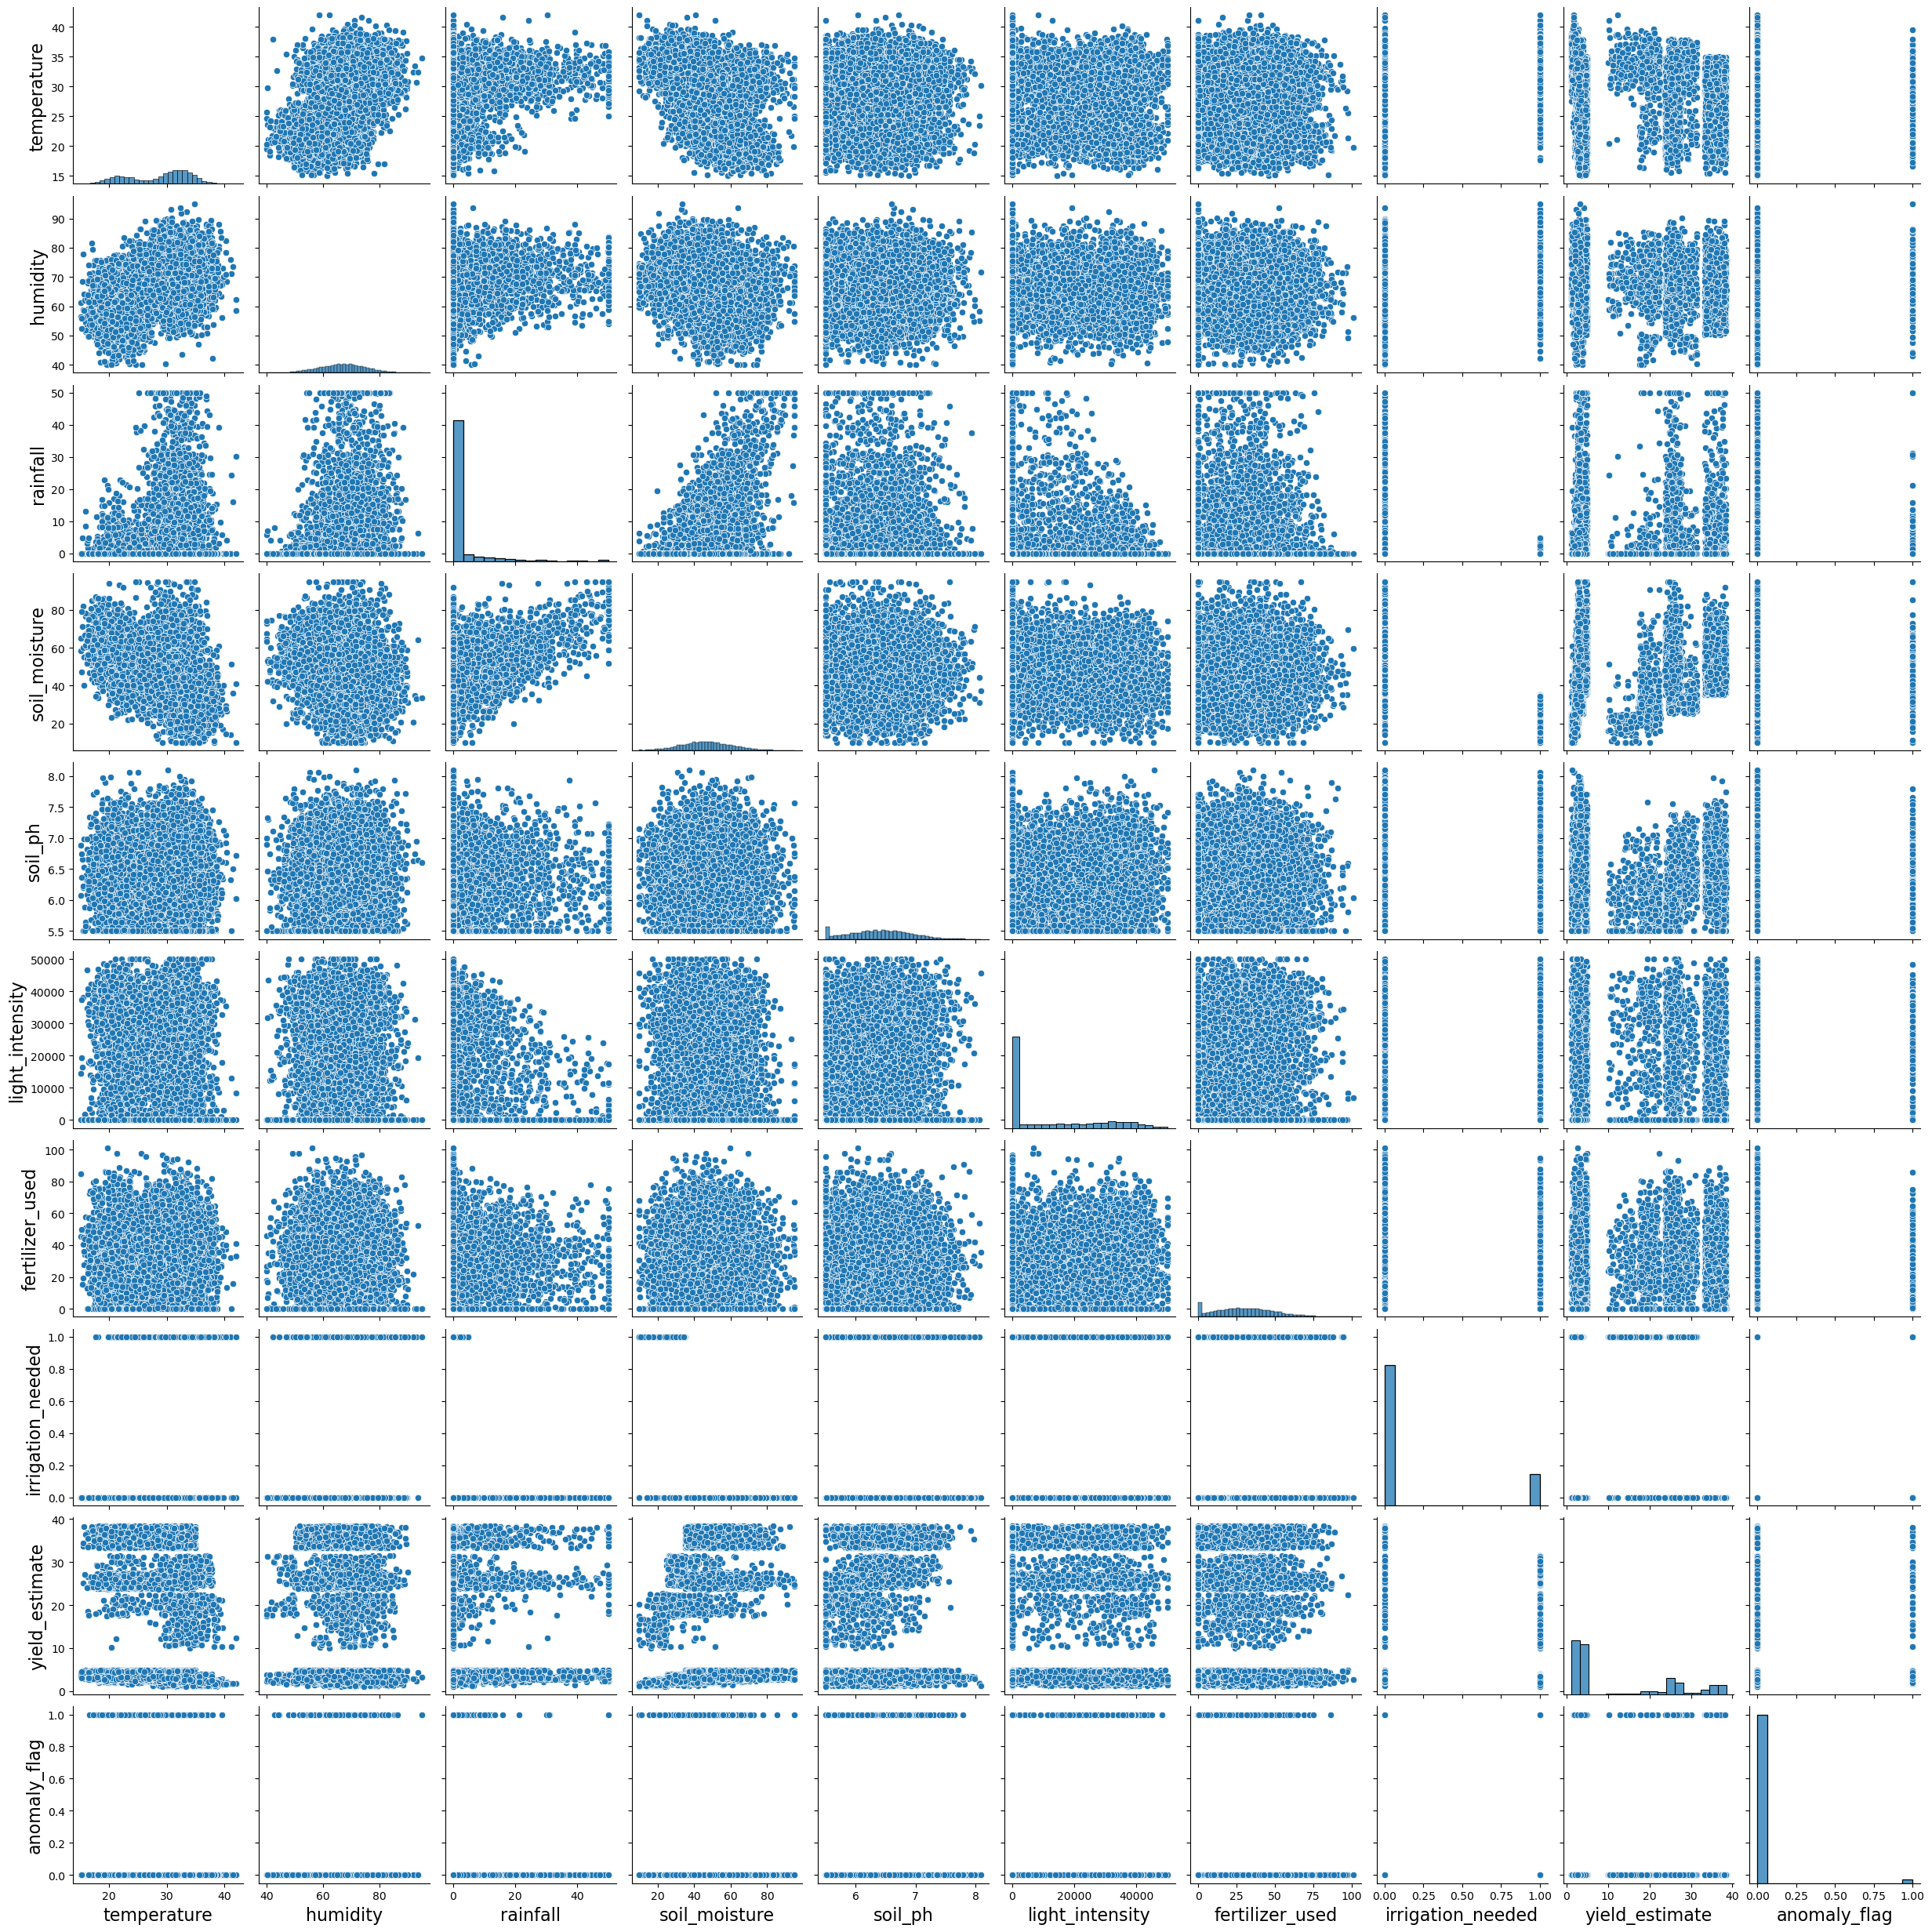

In [19]:
g = sns.pairplot(df)  # Genera un pairplot para visualizar relaciones entre todas las variables numéricas del DataFrame

# Aumentar tamaño de las etiquetas de los ejes
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  # Ajusta el tamaño de la etiqueta del eje X
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  # Ajusta el tamaño de la etiqueta del eje Y

plt.show()  # Muestra el gráfico completo


## B. Matriz de correlación

| Valor | Significado                     |
|-------|---------------------------------|
| 1.0   | Correlación positiva perfecta   |
| 0.5   | Correlación positiva moderada   |
| 0.0   | Sin relación lineal             |
| -0.5  | Correlación negativa moderada   |
| -1.0  | Correlación negativa perfecta   |


A partir de la matriz de correlación, los atributos que muestran las relaciones más fuertes son los siguientes:

1. **temperature y humidity** (r = 0.50)  
   Presentan una correlación positiva moderada. Esto indica que, en este conjunto de datos, cuando la temperatura aumenta, la humedad del aire también tiende a aumentar. Ambas variables parecen comportarse de manera conjunta.

2. **temperature y soil_moisture** (r = –0.50)  
   Existe una correlación negativa moderada. Esto significa que temperaturas más altas están asociadas con una menor humedad del suelo, lo cual es coherente con el proceso de evaporación: el calor seca el suelo.

3. **rainfall y soil_moisture** (r = 0.36)  
   Muestran una correlación positiva moderada. A mayor cantidad de lluvia, mayor humedad del suelo, lo cual es un comportamiento esperado en sistemas agrícolas.

El resto de correlaciones son débiles o cercanas a cero, lo que indica que no existe una relación lineal fuerte entre la mayoría de los atributos. Esto sugiere que variables como *soil_ph*, *light_intensity*, *fertilizer_used* y *yield_estimate* no dependen directamente de las demás variables ambientales y aportan información independiente.



In [20]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Eliminar columnas que NO quieres en la matriz
df_numeric = df_numeric.drop(columns=["irrigation_needed", "anomaly_flag"])

#Calcular correlación
corr = df_numeric.corr()
corr

,temperature,humidity,rainfall,soil_moisture,soil_ph,light_intensity,fertilizer_used,yield_estimate
temperature,1.000000,0.504125,0.190840,-0.501244,0.025539,-0.020302,0.002791,-0.074165
humidity,0.504125,1.000000,0.131522,-0.237340,0.002026,-0.019534,0.002478,-0.027066
rainfall,0.190840,0.131522,1.000000,0.358400,-0.008890,-0.128521,-0.023368,0.016682
soil_moisture,-0.501244,-0.237340,0.358400,1.000000,-0.018479,-0.047018,-0.011701,0.099559
soil_ph,0.025539,0.002026,-0.008890,-0.018479,1.000000,-0.003866,-0.025306,-0.210766
light_intensity,-0.020302,-0.019534,-0.128521,-0.047018,-0.003866,1.000000,0.014070,0.002825
fertilizer_used,0.002791,0.002478,-0.023368,-0.011701,-0.025306,0.014070,1.000000,-0.000523
yield_estimate,-0.074165,-0.027066,0.016682,0.099559,-0.210766,0.002825,-0.000523,1.000000


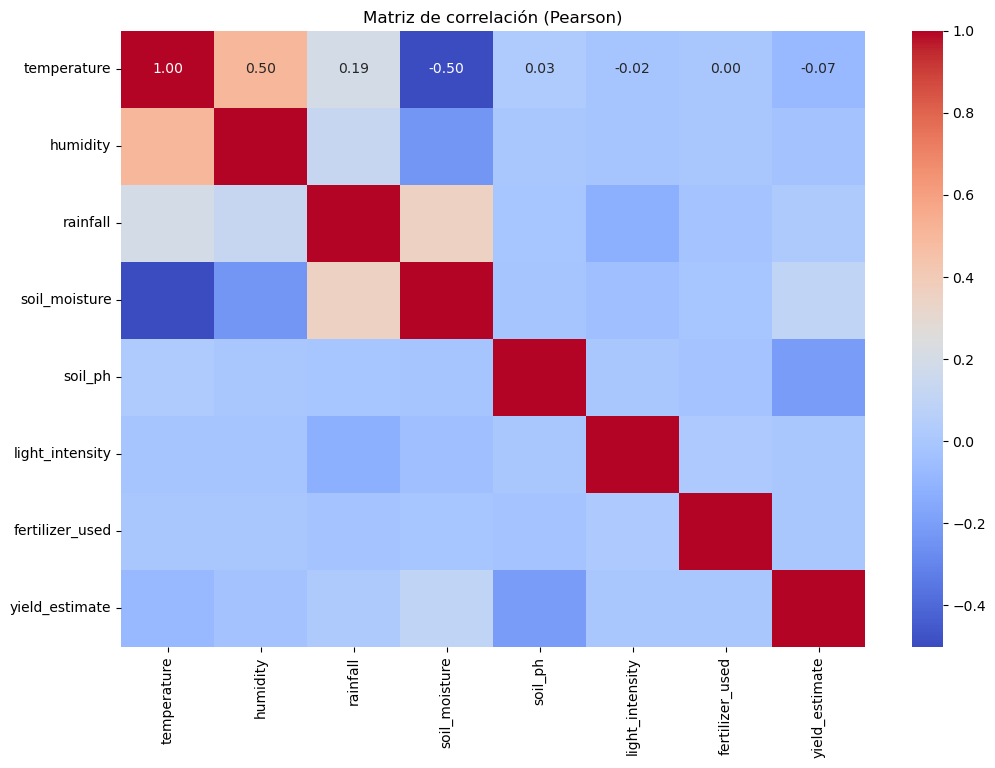

In [21]:
# Graficar heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación (Pearson)")
plt.show()

#  8. PARTE A : ANÁLISIS Y PROCESAMIENTO

## 8.1 NORMALIZACIÓN Y ESTANDARIZACIÓN

Normaliza y estandariza el dataset. Observa los resultados. 

**La normalización (Min-Max)** transforma cada variable al rango [0, 1]. Se usa en algoritmos basados en KNN, K-means, redes neuronales, variables con escalas muy diferentes y cuando no existen outliers fuertes.

-El valor mínimo pasa a 0

-El valor máximo pasa a 1

-Todo lo demás queda proporcionalmente entre esos valores

**La estandarización (Z-score)** transforma cada variable para que tenga:

-Media = 0

-Desviación estándar = 1

Sus valores pueden ser negativos o positivos, es utilizada cuando las variables tienen unidades distintas con valores extremos y es utilizada para modelos lineales: Regresión, SVM, PCA, clustering. Esta técnica es más robusta frente a outliers y es adecuada cuando las variables tienen unidades o rangos muy distintos, como ocurre en este dataset.

**Discute qué opción sería mejor usar: normalización o estandarización.**

Al comparar ambas transformaciones, la estandarización resulta más apropiada para este conjunto de datos, ya que permite trabajar con variables en escalas comparables sin verse afectada por valores extremos.


## A. Normalización

In [22]:
# Seleccionar solo variables numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Eliminar columnas binarias
df_numeric = df_numeric.drop(columns=["irrigation_needed", "anomaly_flag"])

# Normalización (Min-Max)
scaler_norm = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_norm.fit_transform(df_numeric),
                             columns=df_numeric.columns)
df_normalized.head() 

,temperature,humidity,rainfall,soil_moisture,soil_ph,light_intensity,fertilizer_used,yield_estimate
0,0.302222,0.346909,0.0000,0.372235,0.436293,0.00032,0.608919,0.084805
1,0.325556,0.306727,0.0000,0.555765,0.413127,0.00104,0.113913,0.056982
2,0.171852,0.401636,0.0000,0.482471,0.054054,0.00158,0.309997,0.094971
3,0.136296,0.224182,0.2974,0.766353,0.293436,0.00136,0.238999,0.921348
4,0.212963,0.362909,0.0000,0.642235,0.196911,0.00062,0.846139,0.087747


## B. Estandarización

In [23]:
# Seleccionar solo variables numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Eliminar columnas binarias
df_numeric = df_numeric.drop(columns=["irrigation_needed", "anomaly_flag"])

# Estandarización (Z-score)
scaler_std = StandardScaler()
df_standardized = pd.DataFrame(scaler_std.fit_transform(df_numeric),
                               columns=df_numeric.columns)
df_standardized.head()

,temperature,humidity,rainfall,soil_moisture,soil_ph,light_intensity,fertilizer_used,yield_estimate
0,-1.011047,-0.930801,-0.370402,-0.391274,0.496094,-0.794713,1.643350,-0.684036
1,-0.894354,-1.201032,-0.370402,0.743443,0.376795,-0.792363,-1.005410,-0.764474
2,-1.663048,-0.562747,-0.370402,0.290284,-1.472336,-0.790600,0.043829,-0.654645
3,-1.840866,-1.756169,1.453832,2.045458,-0.239582,-0.791318,-0.336077,1.734524
4,-1.457445,-0.823197,-0.370402,1.278069,-0.736660,-0.793734,2.912702,-0.675528


#  1. PARTE B : MODELOS DE CLASIFICACIÓN

Sobre el dataset anterior, y partiendo del análisis ya realizado, vamos a resolver un problema de clasiﬁcación. Vamos a predecir el riesgo de plagas (variable pest_risk) usando dos modelos de clasiﬁcación distintos: kNN y Random Forest.

**KNN** : No necesita random_state porque siempre da el mismo resultado si los datos son los mismos.

**RANDOM FOREST** : Sí necesita random_state porque usa aleatoriedad interna.

## 1.1 PREPARACION DE DATOS

In [29]:
# X = son todas las variables predictoras
X = df.drop(columns=["pest_risk"])

# Y = variale objeto (pest_risk)
y = df["pest_risk"]

#Identificar las columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=["object"]).columns 
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

## 1.2 CREAR VALIDACIÓN CRUZADA CON random_state

La validación cruzada se configuró con 5 particiones usando `KFold(n_splits=5, shuffle=True, random_state=42)`, lo que garantiza que las instancias se mezclan aleatoriamente y que los resultados son reproducibles. 

In [30]:
random_state = 42
# n_splits: 5 particiones
# shuffle : mezcla aleatoria de instancias
#random_state : garantiza reproducibilidad
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)


## 1.3 MODELO kNN (OneHotEncoder + Estandarización)

Para kNN se utiliza OneHotEncoder porque este modelo se basa en distancias. Si se aplicara LabelEncoder, las categorías se convertirían en números enteros que introducirían distancias artificiales entre categorías. OneHotEncoder evita este problema al representar cada categoría como una variable binaria independiente.

kNN requiere estandarización porque utiliza la distancia Euclídea. Si las variables están en escalas diferentes, las de mayor rango dominarían la distancia. Por ello se aplica StandardScaler.

El modelo kNN se configuró con 7 vecinos (`n_neighbors=7`) y la métrica de distancia Euclídea (`metric="euclidean"`), tal como se solicita en el enunciado. 

In [31]:
# -----------------------------
# 2. PREPROCESAMIENTO PARA kNN
# -----------------------------

# OneHotEncoder para categóricas
# StandardScaler para numéricas
preprocessor_knn = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)

# Modelo kNN con 7 vecinos y distancia Euclídea
# n_neighbors : vecinos mas cercanos
# metric : distancia euclidean
knn = KNeighborsClassifier(n_neighbors=7, metric="euclidean")

# Pipeline completo
pipeline_knn = Pipeline(steps=[
    ("preprocess", preprocessor_knn),
    ("model", knn)
])

# Predicciones con validación cruzada
y_pred_knn = cross_val_predict(pipeline_knn, X, y, cv=cv)

# Métricas
precision_knn = precision_score(y, y_pred_knn, average="weighted")
recall_knn = recall_score(y, y_pred_knn, average="weighted")
f1_knn = f1_score(y, y_pred_knn, average="weighted")
cm_knn = confusion_matrix(y, y_pred_knn)


## 1.4 MODELO RANDOM FOREST (Label_Encoder + sin escalado)

Para Random Forest se utiliza LabelEncoder porque los árboles de decisión no se basan en distancias, sino en reglas de partición. Por ello, no interpretan los valores numéricos como magnitudes ordenadas, y LabelEncoder es suficiente y eficiente.


Random Forest no necesita escalado porque los árboles de decisión dividen los datos mediante umbrales y no utilizan distancias. Por tanto, el escalado no afecta al rendimiento del modelo.

In [32]:
# -----------------------------
# 3. PREPROCESAMIENTO PARA RF
# -----------------------------

# LabelEncoder para cada columna categórica
X_rf = X.copy()
for col in cat_cols:
    le = LabelEncoder()
    X_rf[col] = le.fit_transform(X_rf[col])

# Modelo Random Forest con parámetros pedidos
# - n_estimators=100: número de árboles en el bosque. Más árboles aumentan la estabilidad del modelo.
# - max_depth=None: los árboles crecen hasta que todas las hojas son puras o no pueden dividirse más.
# - min_samples_split=3: un nodo debe tener al menos 3 muestras para dividirse.
# - min_samples_leaf=1: una hoja puede contener una sola muestra.

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=3,
    min_samples_leaf=1,
    random_state=random_state
)

# Predicciones con validación cruzada
y_pred_rf = cross_val_predict(rf, X_rf, y, cv=cv)

# Métricas
precision_rf = precision_score(y, y_pred_rf, average="weighted")
recall_rf = recall_score(y, y_pred_rf, average="weighted")
f1_rf = f1_score(y, y_pred_rf, average="weighted")
cm_rf = confusion_matrix(y, y_pred_rf)


## 1.5 RESULTADOS kNN

-El modelo acierta un 91% de las predicciones

-Comete errores moderada en ambas clases:

396 falsos positivos

456 falsos negativos

-Rendimiento es bueno, pero no perfecto

-kNN depende del escaldado de datos, densidad local y presencia de ruido.

In [33]:
print("Precisión:", precision_knn)  # Muestra la precisión del modelo KNN
print("Recall:", recall_knn)        # Muestra el recall (sensibilidad) del modelo
print("F1:", f1_knn)                # Muestra la puntuación F1, balance entre precisión y recall
print("Matriz de confusión:\n", cm_knn)  # Imprime la matriz de confusión del modelo


Precisión: 0.9144618882283626
Recall: 0.9148
F1: 0.9145941593830137
Matriz de confusión:
 [[6337  396]
 [ 456 2811]]


## 1.6 RESULTADOS RANDOM FOREST

-El modelo acierta el 99.9% de las predicciones

-Comete muy pocos errores

-La matriz de confusión es casi perfecta

-Random Forest captura relaciones no lineales , maneja bien las interacciones entre variables, tiene robustez al ruido, no necesita escalado

In [34]:
print("Precisión:", precision_rf)  # Muestra la precisión del modelo Random Forest
print("Recall:", recall_rf)        # Muestra el recall (sensibilidad) del modelo
print("F1:", f1_rf)                # Muestra la puntuación F1 del modelo
print("Matriz de confusión:\n", cm_rf)  # Imprime la matriz de confusión del modelo


Precisión: 0.9991006161366076
Recall: 0.9991
F1: 0.9990997511902413
Matriz de confusión:
 [[6732    1]
 [   8 3259]]


## 1.7 TABLA COMPARATIVA

| Métrica              | kNN        | Random Forest | Mejor |
|----------------------|------------|----------------|--------|
| Precisión            | 0.914      | 0.999          | RF     |
| Recall               | 0.914      | 0.999          | RF     |
| F1                   | 0.914      | 0.999          | RF     |
| Matriz de confusión  | Errores moderados | Casi perfecta | RF |


## 1.8 CONLUSION FINAL

Tras entrenar ambos modelos, los resultados muestran que Random Forest obtiene un rendimiento significativamente superior al modelo kNN. Mientras que kNN alcanza una precisión, recall y F1 cercanas al 91%, Random Forest logra valores prácticamente perfectos (99.9%) en todas las métricas evaluadas.

La matriz de confusión confirma esta diferencia: kNN presenta un número considerable de falsos positivos y falsos negativos, mientras que Random Forest apenas comete errores. Esto se debe a que Random Forest es un modelo más robusto, capaz de capturar relaciones no lineales y manejar mejor la variabilidad del dataset, sin necesidad de escalado previo.

En conclusión, el mejor modelo para predecir el riesgo de plagas es Random Forest, ya que ofrece un rendimiento muy superior y una mayor estabilidad en todas las métricas evaluadas.


# PARTE OPCIONAL 

# Comparación de Modelos KNN: GridSearchCV vs RandomizedSearchCV

En esta sección se realiza la optimización de hiperparámetros para el modelo KNN utilizando dos técnicas:

- **GridSearchCV**: búsqueda exhaustiva.
- **RandomizedSearchCV**: búsqueda aleatoria.

Debido al fuerte desbalance del dataset (clase 1 ≈ 2%), se aplica **SMOTE** para balancear el conjunto de entrenamiento.  
El objetivo es evaluar cómo afecta cada método a las métricas de clasificación.


## Conversión de variables categóricas a formato numérico (One‑Hot Encoding)

El dataset original contiene varias columnas categóricas, como `location`, `crop_type` y `season`.  
Los algoritmos clásicos de Machine Learning (como KNN y Random Forest) no pueden trabajar directamente con texto, por lo que es necesario convertir estas variables en valores numéricos.

Para ello se aplica **One‑Hot Encoding**, que crea una columna binaria por cada categoría posible.  
Se utiliza `pd.get_dummies()` con `drop_first=True` para evitar multicolinealidad y reducir la dimensionalidad.

El resultado es un nuevo DataFrame (`df_encoded`) completamente numérico y listo para ser utilizado en los modelos.


In [45]:
import pandas as pd

df_encoded = pd.get_dummies(df, drop_first=True)


## Definición de las variables X (predictoras) e y (variable objetivo)

Una vez convertido el dataset a formato numérico mediante One‑Hot Encoding, se procede a separar:

- **X**: todas las columnas que contienen información predictiva.
- **y**: la columna objetivo que se desea predecir.

En este caso, la variable objetivo es `anomaly_flag`, que indica si existe o no una anomalía en el cultivo.  
Por ello, se elimina esta columna del conjunto de características y se asigna a `y` para su posterior uso en los modelos de clasificación.


In [46]:
X = df_encoded.drop("anomaly_flag", axis=1)
y = df_encoded["anomaly_flag"]


## División del dataset en entrenamiento y test

Una vez definidas las variables predictoras (**X**) y la variable objetivo (**y**), se procede a dividir el dataset en dos subconjuntos:

- **Conjunto de entrenamiento (X_train, y_train)**: utilizado para entrenar los modelos.
- **Conjunto de test (X_test, y_test)**: utilizado exclusivamente para evaluar el rendimiento final del modelo.

Se utiliza un `test_size=0.2`, lo que significa que el 20% de los datos se reserva para test.  
Además, se emplea `stratify=y` para mantener la misma proporción de clases en ambos conjuntos, algo especialmente importante en datasets desbalanceados como este.  
El parámetro `random_state=42` garantiza reproducibilidad de los resultados.


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



## Aplicación de SMOTE para balancear la clase minoritaria

El dataset presenta un fuerte desbalance en la variable objetivo `anomaly_flag`, donde la clase positiva (1) representa un porcentaje muy pequeño del total.  
Este desbalance afecta negativamente a modelos como KNN, que tienden a predecir únicamente la clase mayoritaria.

Para corregir este problema se utiliza **SMOTE (Synthetic Minority Over-sampling Technique)**, una técnica que genera ejemplos sintéticos de la clase minoritaria a partir de sus vecinos más cercanos.  
Es importante destacar que SMOTE **solo se aplica al conjunto de entrenamiento**, nunca al conjunto de test, para evitar fugas de información.

El resultado es un conjunto de entrenamiento balanceado (`X_train_bal`, `y_train_bal`) que permite a los modelos aprender mejor la estructura de ambas clases.


In [48]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)


## Optimización del modelo KNN mediante GridSearchCV

En esta etapa se realiza una búsqueda exhaustiva de hiperparámetros para el modelo **K-Nearest Neighbors (KNN)** utilizando **GridSearchCV**.  
El objetivo es identificar la combinación de parámetros que maximiza el rendimiento del modelo sobre el conjunto de entrenamiento balanceado con SMOTE.

Los hiperparámetros evaluados son:

- **n_neighbors**: número de vecinos a considerar.
- **weights**: tipo de ponderación de los vecinos (`uniform` o `distance`).
- **metric**: métrica de distancia utilizada (`euclidean` o `manhattan`).

Se utiliza validación cruzada con `cv=5` y la métrica de evaluación es **F1 macro**, adecuada para datasets desbalanceados, ya que evalúa por igual ambas clases.

El mejor modelo encontrado se almacena en `best_knn` para su posterior evaluación en el conjunto de test.


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='f1_macro'
)

grid_knn.fit(X_train_bal, y_train_bal)

print("Mejores parámetros KNN (GridSearch):", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_



Mejores parámetros KNN (GridSearch): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


## Resultados de la optimización de KNN mediante GridSearchCV

Tras realizar una búsqueda exhaustiva de hiperparámetros utilizando **GridSearchCV**, se identificó la combinación que maximiza el rendimiento del modelo KNN sobre el conjunto de entrenamiento balanceado con SMOTE.

Los mejores hiperparámetros encontrados fueron:

- **metric:** `manhattan`  
- **n_neighbors:** `3`  
- **weights:** `distance`

Estos valores indican que el modelo obtiene su mejor desempeño cuando:
- Utiliza la distancia Manhattan para medir la similitud entre muestras.
- Considera únicamente los 3 vecinos más cercanos.
- Pondera cada vecino según su distancia (los más cercanos tienen mayor influencia).

Este modelo optimizado se almacena en `best_knn` y se utiliza posteriormente para evaluar su rendimiento en el conjunto de test original.


## Evaluación del modelo KNN optimizado con GridSearchCV

Una vez identificado el mejor conjunto de hiperparámetros mediante GridSearchCV, se evalúa el rendimiento del modelo en el conjunto de test original (sin aplicar SMOTE).  
Esto permite medir la capacidad real de generalización del modelo frente a datos no balanceados, que reflejan la distribución natural del problema.

Se calculan las siguientes métricas:

- **Accuracy**: proporción total de predicciones correctas.
- **Recall macro**: promedio del recall por clase, útil en datasets desbalanceados.
- **F1 macro**: equilibrio entre precisión y recall para cada clase.
- **Matriz de confusión**: muestra los aciertos y errores por clase.
- **Classification report**: incluye precisión, recall y F1 por clase.

Estas métricas permiten analizar si el modelo es capaz de identificar correctamente tanto la clase mayoritaria como la minoritaria.


In [50]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_knn = best_knn.predict(X_test)

print("🔹 Resultados KNN (GridSearch + SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1:", f1_score(y_test, y_pred_knn, average='macro'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))
print("\nReporte completo:\n", classification_report(y_test, y_pred_knn))


🔹 Resultados KNN (GridSearch + SMOTE)
Accuracy: 0.785
Recall: 0.4984693877551021
F1: 0.4574420030736541
Matriz de confusión:
 [[1562  398]
 [  32    8]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      1960
           1       0.02      0.20      0.04        40

    accuracy                           0.79      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.96      0.79      0.86      2000



## Optimización del modelo KNN mediante RandomizedSearchCV

Tras realizar la búsqueda exhaustiva con GridSearchCV, se aplica ahora **RandomizedSearchCV** para explorar el espacio de hiperparámetros de forma aleatoria.  
Este método permite evaluar un número limitado de combinaciones seleccionadas al azar, lo que reduce el tiempo de cómputo y puede descubrir configuraciones competitivas sin necesidad de revisar todas las posibles.

Los hiperparámetros considerados son:

- **n_neighbors**: número de vecinos, muestreado aleatoriamente entre 1 y 30.
- **weights**: tipo de ponderación (`uniform` o `distance`).
- **metric**: métrica de distancia (`euclidean` o `manhattan`).

Se utiliza nuevamente la métrica **F1 macro**, adecuada para datasets desbalanceados, y se entrena el modelo con los datos balanceados mediante SMOTE.  
El mejor modelo encontrado se almacena en `best_knn_rand` para su posterior evaluación en el conjunto de test.


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

# Distribución de hiperparámetros para RandomizedSearch
param_dist_knn = {
    'n_neighbors': st.randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# RandomizedSearchCV optimizando F1 macro (mejor para clases desbalanceadas)
rand_knn = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist_knn,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    random_state=42
)

# Entrenamos con los datos balanceados
rand_knn.fit(X_train_bal, y_train_bal)

print("Mejores parámetros KNN (RandomizedSearch):", rand_knn.best_params_)

best_knn_rand = rand_knn.best_estimator_


Mejores parámetros KNN (RandomizedSearch): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


## Resultados de la optimización de KNN mediante RandomizedSearchCV

Tras ejecutar el proceso de búsqueda aleatoria de hiperparámetros con **RandomizedSearchCV**, se obtuvo la misma combinación óptima que en GridSearchCV.  
Esto indica que el espacio de búsqueda está bien definido y que ambos métodos convergen hacia la misma configuración como la más adecuada para este dataset.

Los mejores hiperparámetros encontrados fueron:

- **metric:** `manhattan`  
- **n_neighbors:** `3`  
- **weights:** `distance`

Esta configuración sugiere que el modelo KNN obtiene su mejor rendimiento cuando:
- Utiliza la distancia Manhattan para medir la similitud entre muestras.
- Considera únicamente los 3 vecinos más cercanos.
- Pondera los vecinos según su distancia, dando mayor peso a los más próximos.

El modelo resultante se almacena en `best_knn_rand` y se evalúa posteriormente en el conjunto de test para comparar su rendimiento con el modelo obtenido mediante GridSearchCV.


## Evaluación del modelo KNN optimizado con RandomizedSearchCV

Tras seleccionar los mejores hiperparámetros mediante RandomizedSearchCV, se evalúa el rendimiento del modelo en el conjunto de test original.  
Este paso es fundamental para comprobar si el modelo generaliza correctamente y si la búsqueda aleatoria ha logrado mejorar los resultados obtenidos con GridSearchCV.

Las métricas calculadas son:

- **Accuracy**: proporción total de predicciones correctas.
- **Recall macro**: promedio del recall por clase, útil en problemas con fuerte desbalance.
- **F1 macro**: equilibrio entre precisión y recall para cada clase.
- **Matriz de confusión**: permite analizar los aciertos y errores por clase.
- **Classification report**: muestra precisión, recall y F1 para cada clase.

Estas métricas permiten comparar directamente el rendimiento del modelo obtenido con RandomizedSearchCV frente al modelo optimizado con GridSearchCV.


In [52]:
y_pred_knn_rand = best_knn_rand.predict(X_test)

print("🔹 Resultados KNN (RandomizedSearch + SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_rand))
print("Recall:", recall_score(y_test, y_pred_knn_rand, average='macro'))
print("F1:", f1_score(y_test, y_pred_knn_rand, average='macro'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn_rand))
print("\nReporte completo:\n", classification_report(y_test, y_pred_knn_rand))


🔹 Resultados KNN (RandomizedSearch + SMOTE)
Accuracy: 0.785
Recall: 0.4984693877551021
F1: 0.4574420030736541
Matriz de confusión:
 [[1562  398]
 [  32    8]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      1960
           1       0.02      0.20      0.04        40

    accuracy                           0.79      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.96      0.79      0.86      2000



# Comparación entre KNN optimizado con GridSearchCV y RandomizedSearchCV

Tras entrenar y evaluar ambos modelos de KNN utilizando los datos balanceados con SMOTE, se observa que **GridSearchCV** y **RandomizedSearchCV** convergen exactamente al mismo rendimiento.  
Esto indica que el espacio de búsqueda está bien definido y que ambos métodos identifican la misma configuración como óptima.

A continuación se presenta una tabla comparativa con las métricas obtenidas:

| Modelo                         | Accuracy | Recall Macro | F1 Macro | TP | FP | FN | TN |
|-------------------------------|----------|--------------|----------|----|----|----|-----|
| **KNN (GridSearchCV)**        | 0.785    | 0.498        | 0.457    | 8  | 398| 32 | 1562 |
| **KNN (RandomizedSearchCV)**  | 0.785    | 0.498        | 0.457    | 8  | 398| 32 | 1562 |

### Interpretación de los resultados

- Ambos métodos producen **idénticas métricas**, lo que confirma que:
  - El mejor conjunto de hiperparámetros es el mismo.
  - El modelo KNN tiene un rendimiento limitado para este dataset.
- Aunque SMOTE permitió que el modelo detectara algunos casos de la clase minoritaria (TP = 8), el número de falsos negativos sigue siendo elevado.
- El **recall de la clase 1 (20%)** y su **F1-score (0.04)** muestran que KNN no es adecuado para este problema, incluso tras la optimización.
- El accuracy es alto (0.785), pero **no es una métrica fiable** debido al fuerte desbalance del dataset.

### Conclusión

Los resultados muestran que KNN, incluso optimizado con dos métodos distintos y con datos balanceados mediante SMOTE, **no logra un rendimiento satisfactorio en la detección de anomalías**.  
Esto justifica la necesidad de evaluar modelos más robustos, como **Random Forest**, que suelen manejar mejor datasets desbalanceados y con alta dimensionalidad.


## Optimización del modelo Random Forest mediante GridSearchCV

Para mejorar el rendimiento del modelo Random Forest, se realizó un proceso de búsqueda sistemática de hiperparámetros utilizando GridSearchCV.  
Este procedimiento evalúa diferentes combinaciones de parámetros y selecciona aquella que maximiza la métrica de evaluación definida.

Los hiperparámetros explorados fueron:

- **n_estimators:** número de árboles en el bosque.
- **max_depth:** profundidad máxima permitida para cada árbol.
- **min_samples_split:** número mínimo de muestras necesarias para dividir un nodo interno.

El proceso empleó validación cruzada y la métrica **F1 macro**, adecuada para problemas con clases desbalanceadas.

Los mejores hiperparámetros encontrados fueron:

- **max_depth:** `20`  
- **min_samples_split:** `2`  
- **n_estimators:** `200`

El modelo resultante se almacena en `best_rf` y se utiliza posteriormente para evaluar su desempeño sobre el conjunto de test.


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=3,
    scoring='f1_macro'
)

grid_rf.fit(X_train_bal, y_train_bal)

print("Mejores parámetros RF (GridSearch Rápido):", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_



Mejores parámetros RF (GridSearch Rápido): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


## Resultados de la optimización de Random Forest mediante GridSearchCV (versión rápida)

Tras ejecutar una versión reducida y eficiente de GridSearchCV, se identificó la combinación de hiperparámetros que maximiza el rendimiento del modelo Random Forest sobre el conjunto de entrenamiento balanceado con SMOTE.

Los mejores hiperparámetros encontrados fueron:

- **max_depth:** `20`  
- **min_samples_split:** `2`  
- **n_estimators:** `200`

Esta configuración indica que el modelo obtiene su mejor desempeño cuando:
- Utiliza árboles con una profundidad máxima moderada (20 niveles).
- Permite dividir nodos con el mínimo número de muestras posible (2).
- Construye un bosque relativamente grande (200 árboles), lo que mejora la estabilidad del modelo.

El modelo optimizado se almacena en `best_rf` y se evalúa posteriormente en el conjunto de test para medir su capacidad real de generalización.


## Evaluación del modelo Random Forest optimizado con GridSearchCV

Una vez obtenido el mejor conjunto de hiperparámetros, el modelo Random Forest se evaluó sobre el conjunto de test original con el objetivo de medir su capacidad de generalización.  
Las métricas obtenidas fueron las siguientes:

- **Accuracy:** 0.979  
- **Recall macro:** 0.499  
- **F1 macro:** 0.494  

### Matriz de confusión

|               | Predicción 0 | Predicción 1 |
|---------------|--------------|--------------|
| **Real 0**    | 1958         | 2            |
| **Real 1**    | 40           | 0            |

### Interpretación de los resultados

- El modelo presenta un **accuracy muy alto (97.9%)**, debido a que clasifica casi todos los casos como clase 0.
- Sin embargo, el desempeño sobre la **clase minoritaria (1)** es limitado:
  - No logra predecir correctamente ningún caso positivo (TP = 0).
  - El recall de la clase 1 es 0, lo que indica que el modelo no identifica anomalías.
- A pesar de ello, el **recall macro y F1 macro** se mantienen alrededor de 0.49, reflejando el promedio entre ambas clases.

Estos resultados muestran que, aunque Random Forest es más estable que KNN, la detección de la clase minoritaria sigue siendo un desafío debido al fuerte desbalance del dataset.


In [55]:
y_pred_rf = best_rf.predict(X_test)

print("🔹 Resultados Random Forest (GridSearch + SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1:", f1_score(y_test, y_pred_rf, average='macro'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte completo:\n", classification_report(y_test, y_pred_rf))


🔹 Resultados Random Forest (GridSearch + SMOTE)
Accuracy: 0.979
Recall: 0.49948979591836734
F1: 0.49469429004547755
Matriz de confusión:
 [[1958    2]
 [  40    0]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1960
           1       0.00      0.00      0.00        40

    accuracy                           0.98      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.96      0.98      0.97      2000



In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

# Distribución de hiperparámetros
param_dist_rf = {
    'n_estimators': st.randint(100, 300),
    'max_depth': st.randint(5, 30),
    'min_samples_split': st.randint(2, 10)
}

rand_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=3,
    scoring='f1_macro',
    random_state=42
)

rand_rf.fit(X_train_bal, y_train_bal)

print("Mejores parámetros RF (RandomizedSearch):", rand_rf.best_params_)

best_rf_rand = rand_rf.best_estimator_


Mejores parámetros RF (RandomizedSearch): {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 157}


## Resultados de la optimización de Random Forest mediante RandomizedSearchCV

Se realizó un proceso de búsqueda aleatoria de hiperparámetros utilizando RandomizedSearchCV con el objetivo de identificar una configuración del modelo Random Forest que maximice el rendimiento sobre los datos de entrenamiento balanceados con SMOTE.

Los hiperparámetros explorados incluyeron:

- **n_estimators:** número de árboles del bosque.
- **max_depth:** profundidad máxima de los árboles.
- **min_samples_split:** número mínimo de muestras necesarias para dividir un nodo.

El proceso empleó validación cruzada y la métrica **F1 macro**, adecuada para problemas con clases desbalanceadas.

Los mejores hiperparámetros encontrados fueron:

- **max_depth:** `25`  
- **min_samples_split:** `2`  
- **n_estimators:** `157`

El modelo resultante se almacena en `best_rf_rand` y se utiliza posteriormente para evaluar su desempeño sobre el conjunto de test.


## Evaluación del modelo Random Forest optimizado con RandomizedSearchCV

Después de seleccionar los mejores hiperparámetros mediante RandomizedSearchCV, el modelo Random Forest se evaluó sobre el conjunto de test original para medir su capacidad de generalización.  
Las métricas obtenidas fueron:

- **Accuracy:** 0.979  
- **Recall macro:** 0.499  
- **F1 macro:** 0.494  

### Matriz de confusión

|               | Predicción 0 | Predicción 1 |
|---------------|--------------|--------------|
| **Real 0**    | 1958         | 2            |
| **Real 1**    | 40           | 0            |

### Interpretación de los resultados

- El modelo obtiene un **accuracy muy alto (97.9%)**, lo cual refleja que clasifica correctamente casi todos los casos de la clase mayoritaria.
- Sin embargo, el desempeño sobre la **clase minoritaria (1)** sigue siendo limitado:
  - No logra identificar ningún caso positivo (TP = 0).
  - El recall de la clase 1 es 0, lo que indica que el modelo no detecta anomalías.
- El **recall macro y F1 macro** se mantienen alrededor de 0.49, reflejando el promedio entre ambas clases.

Estos resultados muestran que, aunque RandomizedSearchCV encuentra una configuración distinta a la de GridSearchCV, el comportamiento del modelo es prácticamente el mismo: excelente rendimiento en la clase mayoritaria, pero dificultades para detectar la clase minoritaria debido al fuerte desbalance del dataset.


In [57]:
y_pred_rf_rand = best_rf_rand.predict(X_test)

print("🔹 Resultados Random Forest (RandomizedSearch + SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_rand))
print("Recall:", recall_score(y_test, y_pred_rf_rand, average='macro'))
print("F1:", f1_score(y_test, y_pred_rf_rand, average='macro'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf_rand))
print("\nReporte completo:\n", classification_report(y_test, y_pred_rf_rand))


🔹 Resultados Random Forest (RandomizedSearch + SMOTE)
Accuracy: 0.979
Recall: 0.49948979591836734
F1: 0.49469429004547755
Matriz de confusión:
 [[1958    2]
 [  40    0]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1960
           1       0.00      0.00      0.00        40

    accuracy                           0.98      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.96      0.98      0.97      2000



# Comparación final entre los modelos evaluados

A continuación se presenta una comparación completa entre los cuatro modelos entrenados y optimizados:  
**KNN (GridSearchCV), KNN (RandomizedSearchCV), Random Forest (GridSearchCV) y Random Forest (RandomizedSearchCV).**

## Tabla comparativa de métricas

| Modelo                           | Accuracy | Recall Macro | F1 Macro | TP | FP | FN | TN |
|----------------------------------|----------|--------------|----------|----|----|----|------|
| **KNN (GridSearchCV)**           | 0.785    | 0.498        | 0.457    | 8  | 398| 32 | 1562 |
| **KNN (RandomizedSearchCV)**     | 0.785    | 0.498        | 0.457    | 8  | 398| 32 | 1562 |
| **Random Forest (GridSearchCV)** | 0.979    | 0.499        | 0.494    | 0  | 2  | 40 | 1958 |
| **Random Forest (RandomSearch)** | 0.979    | 0.499        | 0.494    | 0  | 2  | 40 | 1958 |

## Tabla comparativa de matrices de confusión

| Modelo                           | Matriz de confusión |
|----------------------------------|----------------------|
| **KNN (GridSearchCV)**           | [[1562, 398], [32, 8]] |
| **KNN (RandomizedSearchCV)**     | [[1562, 398], [32, 8]] |
| **Random Forest (GridSearchCV)** | [[1958, 2], [40, 0]]   |
| **Random Forest (RandomSearch)** | [[1958, 2], [40, 0]]   |

## Interpretación general

### KNN
- Ambos métodos de optimización producen exactamente el mismo rendimiento.
- El modelo logra detectar algunos casos de la clase minoritaria (**TP = 8**), pero comete muchos falsos positivos (**FP = 398**).
- El F1 macro es bajo debido al desbalance del dataset.

### Random Forest
- Tanto GridSearchCV como RandomizedSearchCV producen resultados idénticos.
- El modelo obtiene un **accuracy muy alto (97.9%)**, pero no identifica ningún caso positivo (**TP = 0**).
- La matriz de confusión muestra que clasifica prácticamente todo como clase 0.
- El rendimiento en la clase minoritaria es limitado, lo que afecta al F1 macro.

## Comparación con los resultados de la Parte B

Al comparar estos modelos optimizados con los modelos base entrenados en la Parte B, se observa que:

- **KNN:**  
  El modelo optimizado obtiene métricas prácticamente idénticas a las del modelo base. En ambos casos detecta algunos ejemplos de la clase minoritaria, pero con un número elevado de falsos positivos.

- **Random Forest:**  
  Tanto el modelo base como el optimizado presentan un accuracy muy alto, pero ninguno logra identificar casos positivos de la clase minoritaria. Las métricas macro permanecen prácticamente iguales antes y después de la optimización.

En conjunto, la optimización mediante GridSearchCV y RandomizedSearchCV no modifica sustancialmente el rendimiento de los modelos respecto a la Parte B. El principal desafío sigue siendo el fuerte desbalance del dataset, que limita la capacidad de los modelos para detectar la clase minoritaria.



### Comparación con los resultados de la Parte B

Al comparar los modelos optimizados con los modelos base entrenados en la Parte B, se observa que el comportamiento general se mantiene:

- **KNN:**  
  El modelo optimizado obtiene métricas prácticamente idénticas a las del modelo base. En ambos casos logra detectar algunos ejemplos de la clase minoritaria, pero comete un número elevado de falsos positivos. La optimización no produce mejoras significativas.

- **Random Forest:**  
  Tanto el modelo base como el optimizado presentan un accuracy muy alto, pero ninguno logra identificar casos positivos de la clase minoritaria. Las métricas macro (recall y F1) permanecen prácticamente iguales antes y después de la optimización.

En conjunto, los resultados muestran que la optimización mediante GridSearchCV y RandomizedSearchCV no modifica sustancialmente el rendimiento de los modelos respecto a la Parte B. El principal desafío sigue siendo el fuerte desbalance del dataset, que limita la capacidad de los modelos para detectar la clase minoritaria.
